In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#df = pd.read_csv("C:/Users/neeth/Downloads/default_of_credit_card_clients.xls")
df = pd.read_csv("/content/default_of_credit_card_clients.csv")
#df = pd.read_csv("filename.csv", on_bad_lines='skip')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2,2,2,26,-1,2,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2,2,2,34,0,0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2,2,1,37,0,0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1,2,1,57,-1,0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21782,21783,130000,2,1,2,25,0,0,0.0,0.0,...,44568.0,48560.0,51529.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,0.0
21783,21784,200000,2,1,2,25,0,-1,-1.0,-1.0,...,92388.0,18758.0,0.0,105.0,99230.0,10038.0,18758.0,0.0,0.0,0.0
21784,21785,320000,2,3,2,25,0,0,0.0,0.0,...,69746.0,70040.0,71076.0,3084.0,3007.0,3031.0,2367.0,2450.0,2432.0,0.0
21785,21786,90000,2,2,2,25,1,-2,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,1
PAY_4,1


In [ ]:
df = df.dropna()

In [ ]:
skewness =df.skew()
skewness

,0
ID,0.000000
LIMIT_BAL,1.037455
SEX,-0.397245
EDUCATION,0.922145
MARRIAGE,-0.030038
AGE,0.733945
PAY_0,0.802940
PAY_2,0.814897
PAY_3,0.905583
PAY_4,1.053758


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['default payment next month'],axis=1)
y = df['default payment next month']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_test

,default payment next month
13649,0.0
8504,0.0
822,0.0
14247,1.0
1492,0.0
...,...
4999,0.0
2962,1.0
18682,1.0
10670,1.0


In [ ]:
from scipy.stats import zscore
for col in X.columns:
    zscores = np.abs(zscore(X[col]))
    out_liers = X[zscores>3]
    print(out_liers[col])

Series([], Name: ID, dtype: int64)
12       630000
433      580000
451      600000
527      620000
555      630000
          ...  
21239    550000
21318    660000
21320    700000
21375    760000
21381    680000
Name: LIMIT_BAL, Length: 99, dtype: int64
Series([], Name: SEX, dtype: int64)
47       5
69       5
385      5
502      6
504      6
        ..
21433    5
21633    5
21669    5
21692    5
21704    5
Name: EDUCATION, Length: 209, dtype: int64
Series([], Name: MARRIAGE, dtype: int64)
246      75
387      73
1029     67
1058     67
1073     66
         ..
21381    64
21384    68
21389    69
21390    67
21391    65
Name: AGE, Length: 110, dtype: int64
360      4
362      4
649      8
749      8
801      4
        ..
20967    5
21031    4
21057    4
21362    5
21509    6
Name: PAY_0, Length: 113, dtype: int64
189      5
649      7
749      7
831      7
848      4
        ..
20967    4
21362    4
21480    4
21507    4
21509    5
Name: PAY_2, Length: 118, dtype: int64
158      4.0
189 

In [ ]:
df["default payment next month"].value_counts()

,count
default payment next month,
0.0,16819
1.0,4967


80-95

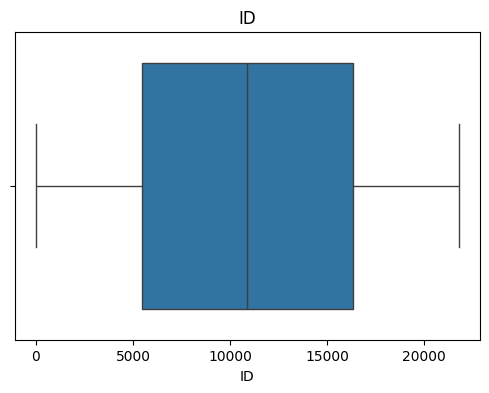

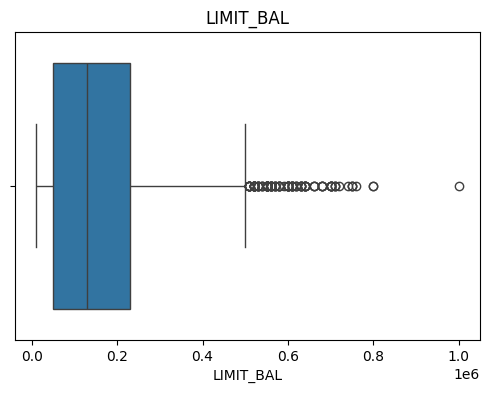

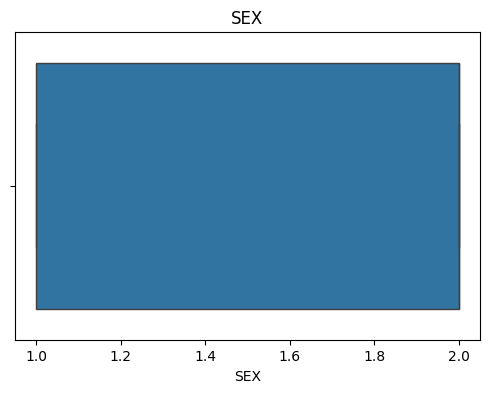

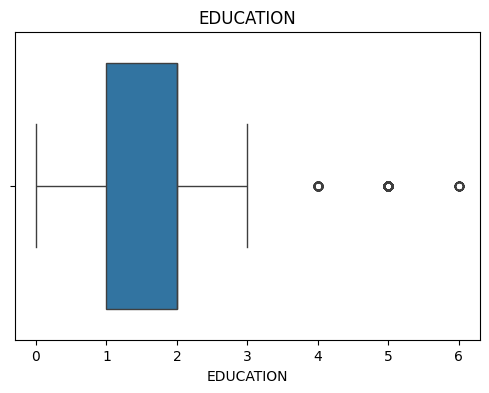

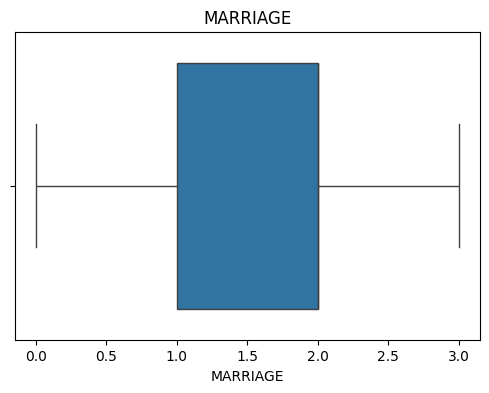

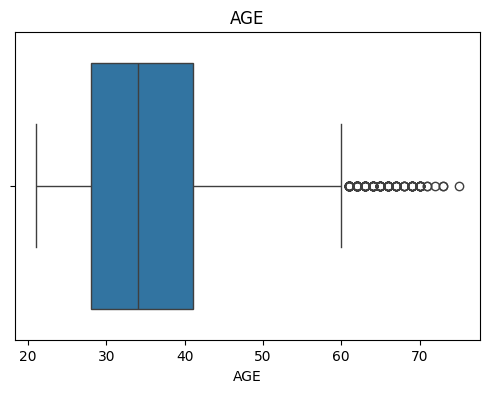

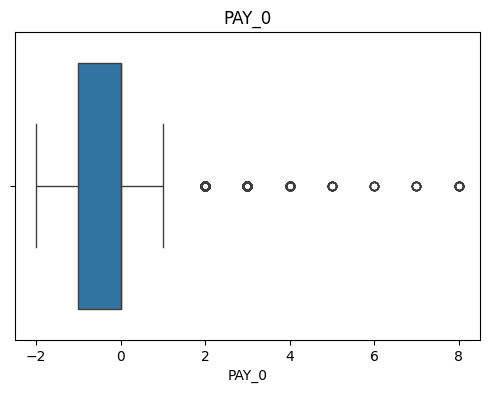

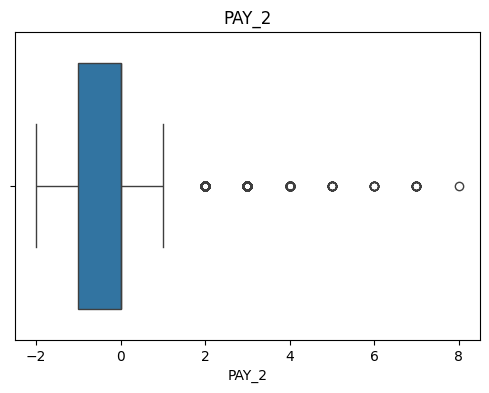

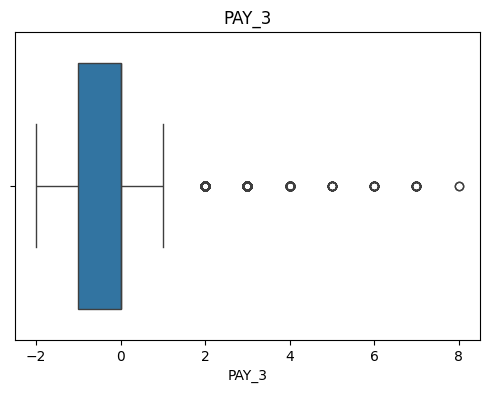

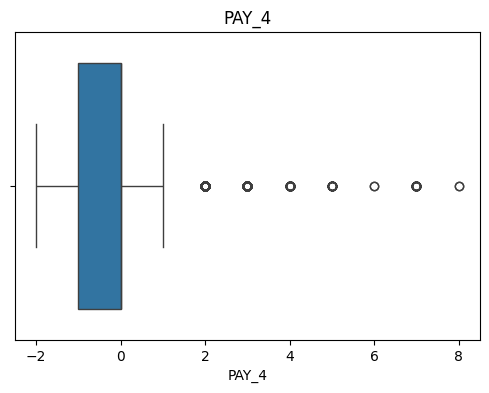

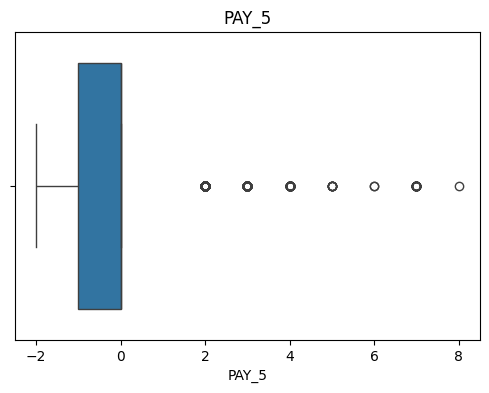

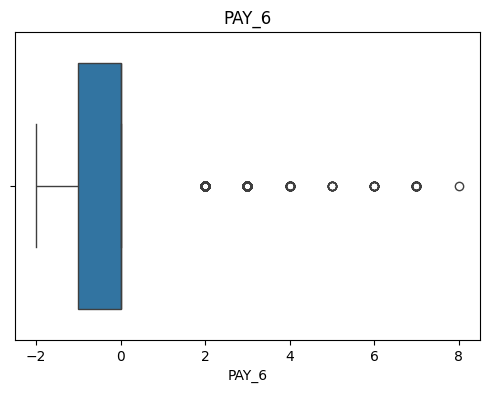

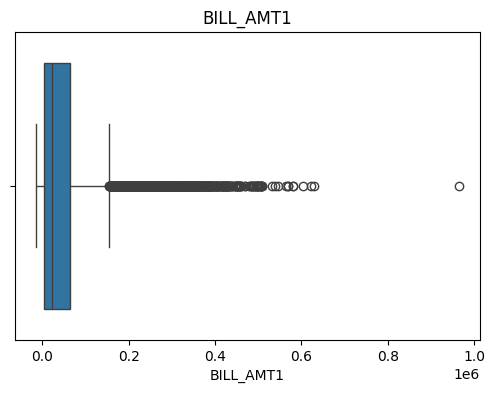

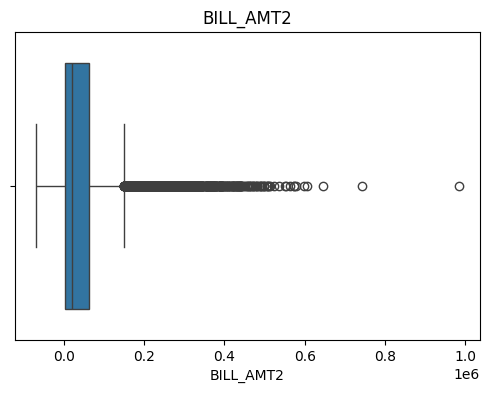

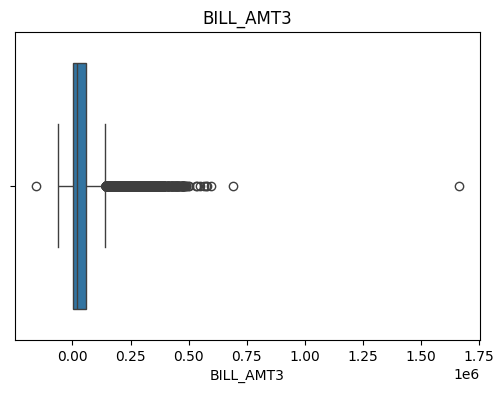

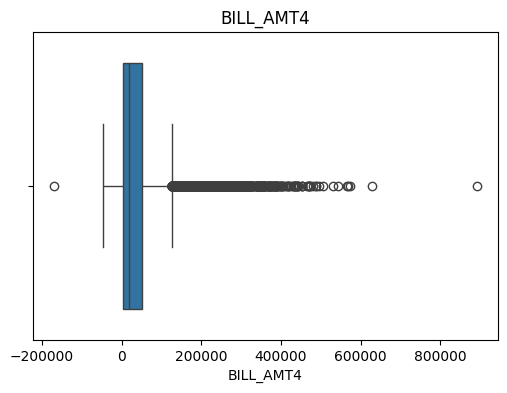

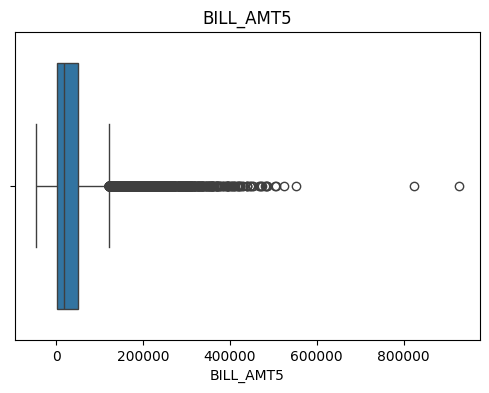

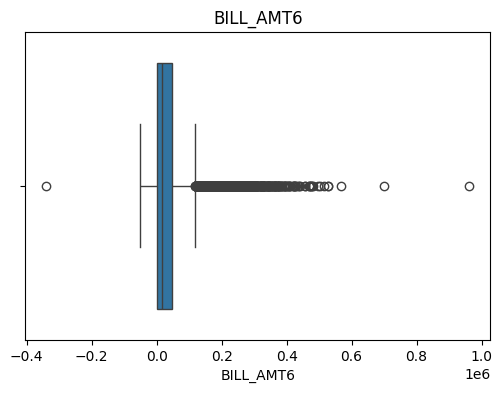

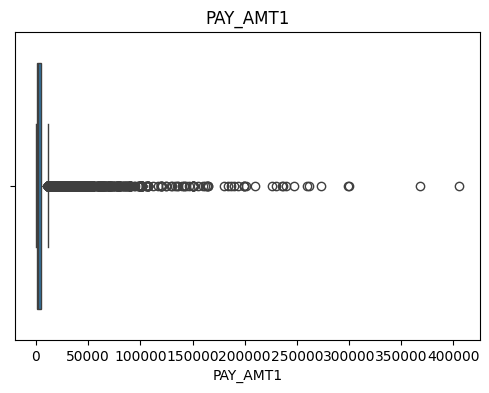

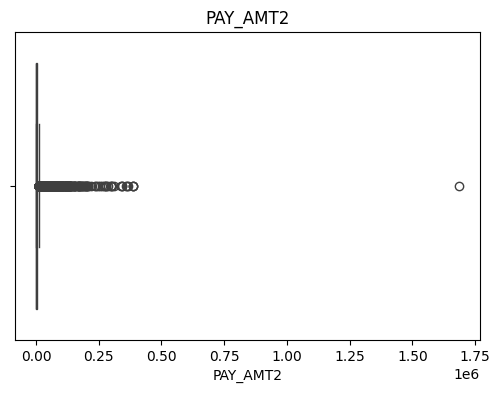

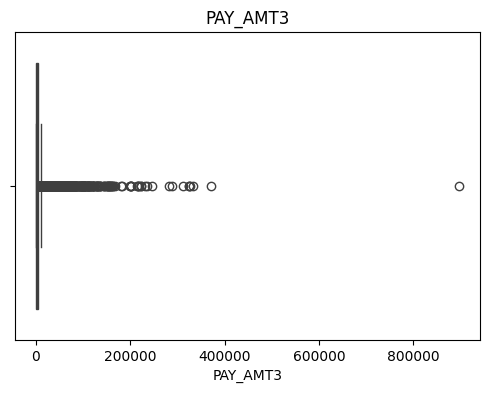

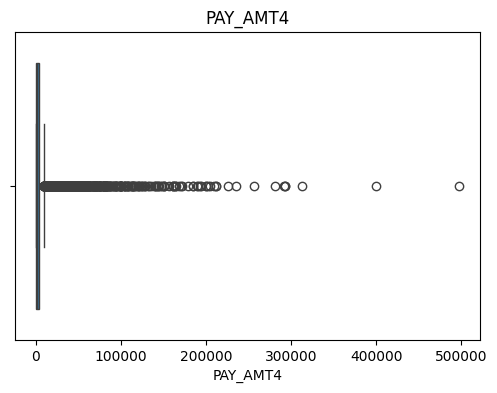

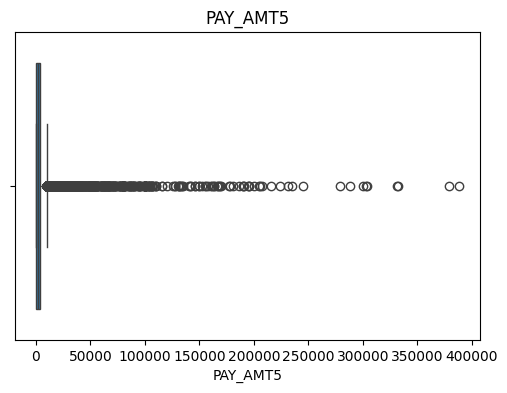

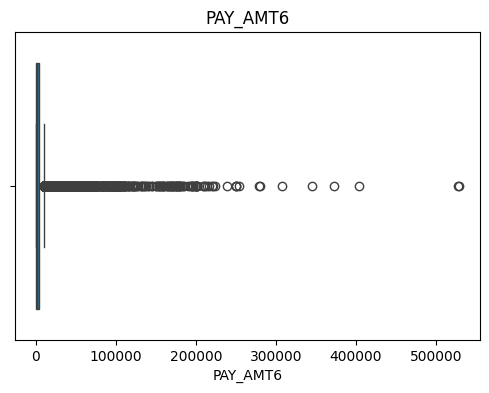

In [ ]:
import matplotlib.pyplot as plt
for col in X_train.columns:
   plt.figure(figsize=(6, 4))
   sns.boxplot(x=X_train[col])
   plt.title(col)
   plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[ 0.25053469,  2.        , -1.        , ...,  1.06710526,
         9.21939473,  2.84423397],
       [-0.22275372, -0.72222222,  0.        , ..., -0.03868421,
         0.21112919,  0.44925125],
       [-0.92942069,  0.05555556, -1.        , ...,  0.15789474,
         7.41945981,  0.93536414],
       ...,
       [ 0.71352023, -0.11111111,  0.        , ..., -0.29526316,
         0.39049788, -0.34455395],
       [-0.02350344,  1.5       , -1.        , ...,  4.14026316,
         0.93094696,  0.68961986],
       [ 0.41114918,  0.        ,  0.        , ...,  0.55263158,
         0.52066385,  0.67938052]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_pred_lr,y_test)
accuracy

0.8083983478659936

In [ ]:
from sklearn.model_selection import RandomizedSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
ds_tree = DecisionTreeClassifier()
ds_tree.fit(X_train,y_train)
y_pred = ds_tree.predict(X_test)
accuracy_dt =accuracy_score(y_pred,y_test)
print("This is the accuracy",accuracy_dt)


This is the accuracy 0.7207434603028913


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf =accuracy_score(y_pred_rf,y_test)
print("This is the accuracy",accuracy_rf)

#help(RandomForestClassifier())

This is the accuracy 0.8102340523175768


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gf = GradientBoostingClassifier()
gf.fit(X_train,y_train)
y_pred_gf = gf.predict(X_test)
accuracy_gf =accuracy_score(y_pred_gf,y_test)
print("This is the accuracy",accuracy_gf)

This is the accuracy 0.8173474070674621


In [ ]:
param_grid_gf = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
   'max_features': ['sqrt', 'log2', None],
    'criterion' :['friedman_mse', 'squared_error'],
   'random_state': [42]
   }
grid_gf = RandomizedSearchCV(gf,param_grid_gf,cv =5,scoring='accuracy',n_jobs =-1, n_iter=30)
grid_gf.fit(X_train,y_train)
print(grid_gf.best_estimator_)
print(grid_gf.best_params_)
print(grid_gf.best_score_)
grid_gf.best_estimator_.fit(X_train,y_train)
y_pred_gf_grid = grid_gf.best_estimator_.predict(X_test)
accuracy_gf_grid = accuracy_score(y_pred_gf_grid,y_test)
print("Accuracy after hyper parameter tuning",accuracy_gf_grid)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_depth=5, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=300,
                           random_state=42)
{'subsample': 1.0, 'random_state': 42, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.01, 'criterion': 'squared_error'}
0.8162725919048196
Accuracy after hyper parameter tuning 0.8171179440110142


In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train_scaled,y_train)
y_pred_sv = sv.predict(X_test_scaled)
accuracy_sv =accuracy_score(y_pred_sv,y_test)
print("This is the accuracy",accuracy_sv)

This is the accuracy 0.8148233134465351


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Base model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print("This is the accuracy", accuracy_knn)

This is the accuracy 0.7921064708581919


In [ ]:
from sklearn.naive_bayes import GaussianNB


# Base model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_pred_nb, y_test)
print("This is the accuracy", accuracy_nb)

This is the accuracy 0.742083524552547


#Based on the above result GradientBoostingClassifier is the best algorithm
#Build model using Randomizedsearchcv.
#Accuracy score after hyperparameter tuning :0.822125

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           min_samples_leaf=4, n_estimators=200,
                           random_state=42, subsample=0.8)
{'subsample': 0.8, 'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05, 'criterion': 'squared_error'}
0.822125
Accuracy after hyper parameter tuning 0.8195

In [ ]:
import pickle
pickle.dump(grid_gf.best_estimator_, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
